<a href="https://colab.research.google.com/github/Kalashri21/Prodigy-Infotech-/blob/main/Prodigy_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
# Load the dataset
data = pd.read_csv("bank-additional.csv", delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
# Preprocess the data
# Encode categorical variables
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
data['y']

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

In [ ]:
# Split the data into features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test

(      age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 926    34       151         2    999         0          -1.8          93.075   
 3855   55       113         2    999         0           1.1          93.994   
 997    33      1132         2    999         0           1.1          93.994   
 3128   32        89         5    999         0           1.4          93.918   
 1953   44       177         1    999         0           1.1          93.994   
 ...   ...       ...       ...    ...       ...           ...             ...   
 3444   60        17        13    999         0           1.4          93.444   
 466    41       268         1    999         0          -0.1          93.200   
 3092   27        55         1    999         0           1.4          93.918   
 3772   34       157         5    999         0          -1.1          94.199   
 860    30       165         1    999         1          -1.8          93.876   
 
       cons.conf.idx  euri

In [ ]:
# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)
y_pred

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8826860841423948
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1105
           1       0.46      0.54      0.49       131

    accuracy                           0.88      1236
   macro avg       0.70      0.73      0.71      1236
weighted avg       0.89      0.88      0.89      1236

Confusion Matrix:
 [[1020   85]
 [  60   71]]


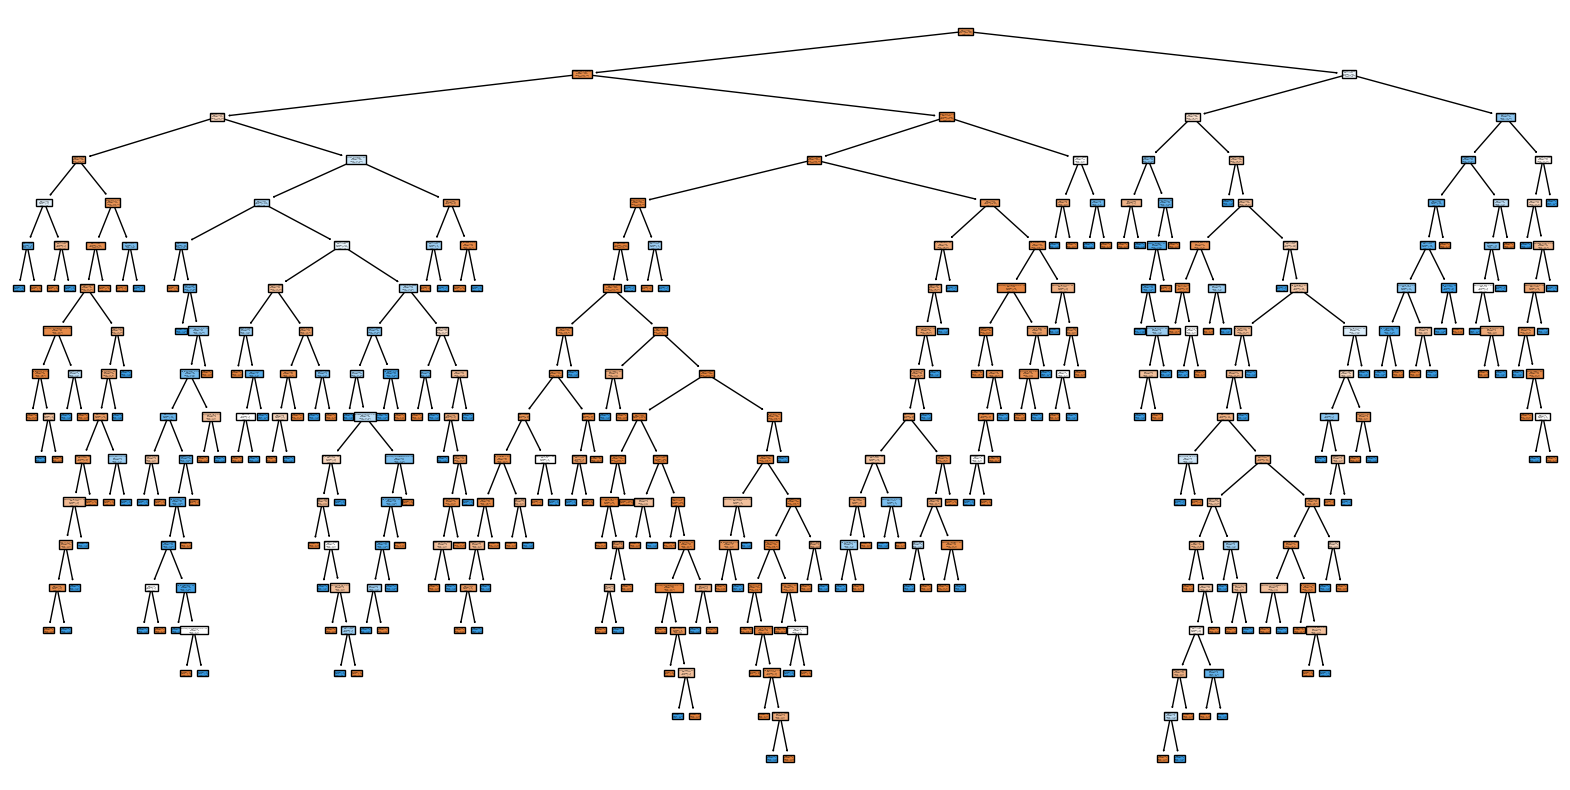

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()